# For Issue 1279
---
Identify addresses or small areas that could benefit from more signage, increased community assistance, or other actions

# Imports
-----

In [1]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests
import urllib3
from sodapy import Socrata

%matplotlib inline
pd.set_option('display.max_columns', None)

# LA 311 API
-----
[API Source](https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2022/i5ke-k6by) | [Documentation](https://dev.socrata.com/foundry/data.lacity.org/i5ke-k6by)

In [2]:
url = "https://data.lacity.org/resource/i5ke-k6by.json"
req = requests.get(url)
print(f'Status: {req.status_code}')

json_311 = req.json()
df_311 = json_normalize(json_311)

Status: 200


# Cleaning
---

In [3]:
print(df_311.shape)
df_311.head()

(1000, 36)


,zipcode,suffix,srnumber,updateddate,closeddate,cd,address,createdbyuserorganization,createddate,requestsource,requesttype,assignto,latitude,owner,housenumber,mobileos,approximateaddress,policeprecinct,cdmember,servicedate,nc,longitude,tbmcolumn,status,tbmrow,direction,anonymous,addressverified,actiontaken,streetname,ncname,apc,tbmpage,location.latitude,location.needs_recoding,location.longitude
0,90292,,1-2154996101,2022-01-03T22:39:18.000,2022-01-03T14:58:20.000,11,"4776 S LA VILLA MARINA, 90292",Self Service_SAN,2022-01-01T00:08:14.000,Self Service,Bulky Items,WLA,33.9812287953,LASAN,4776,,N,PACIFIC,Mike Bonin,2022-01-03T00:00:00.000,70,-118.433950454,C,Closed,7,S,N,Y,SR Created,LA VILLA MARINA,Del Rey,West Los Angeles APC,672,33.9812287953,False,-118.433950454
1,90044,,1-2154995181,2022-01-01T13:06:13.000,2022-01-01T13:06:13.000,8,"HOOVER ST AT IMPERIAL HWY, 90044",LASAN,2022-01-01T00:15:59.000,Call,Dead Animal Removal,HB,33.930968583,LASAN,NaN,,N,SOUTHEAST,Marqueece Harris-Dawson,NaN,90,-118.286997573,B,Closed,6,,N,Y,SR Created,,Harbor Gateway North,South Los Angeles APC,704,33.930968583,False,-118.286997573
2,91604,AVE,1-2154996311,2022-01-03T00:21:42.000,2022-01-03T00:21:40.000,2,"4144 N TUJUNGA AVE, 91604",Self Service,2022-01-01T00:24:31.000,Self Service,Bulky Items,EV,34.1436314704,LASAN,4144,,N,NORTH HOLLYWOOD,Paul Krekorian,2022-01-05T00:00:00.000,27,-118.378844267,J,Cancelled,5,N,N,Y,SR Created,TUJUNGA,Studio City,South Valley APC,562,34.1436314704,False,-118.378844267
3,91311,AVE,1-2154996331,2022-01-03T09:37:09.000,2022-01-03T09:37:08.000,12,"10118 N LURLINE AVE, 91311",Self Service_SAN,2022-01-01T00:24:38.000,Self Service,Metal/Household Appliances,WV,34.2540709722,LASAN,10118,,N,DEVONSHIRE,John Lee,2022-01-04T00:00:00.000,99,-118.584098582,C,Cancelled,4,N,N,Y,SR Created,LURLINE,Chatsworth,North Valley APC,500,34.2540709722,False,-118.584098582
4,91344,DR,1-2155001411,2022-01-01T12:42:08.000,2022-01-01T12:42:08.000,12,"17101 W SUNDERLAND DR, 91344",Self Service,2022-01-01T00:28:49.000,Mobile App,Other,,34.2950649839,ITA,17101,iOS,N,DEVONSHIRE,John Lee,NaN,4,-118.505482504,C,Closed,6,W,Y,Y,SR Created,SUNDERLAND,Granada Hills North,North Valley APC,481,34.2950649839,False,-118.505482504


In [4]:
df_311.columns

Index(['zipcode', 'suffix', 'srnumber', 'updateddate', 'closeddate', 'cd',
       'address', 'createdbyuserorganization', 'createddate', 'requestsource',
       'requesttype', 'assignto', 'latitude', 'owner', 'housenumber',
       'mobileos', 'approximateaddress', 'policeprecinct', 'cdmember',
       'servicedate', 'nc', 'longitude', 'tbmcolumn', 'status', 'tbmrow',
       'direction', 'anonymous', 'addressverified', 'actiontaken',
       'streetname', 'ncname', 'apc', 'tbmpage', 'location.latitude',
       'location.needs_recoding', 'location.longitude'],
      dtype='object')

In [5]:
df_311.isnull().sum().sum()

162

In [6]:
# df_311.dtypes

In [7]:
df_311['latitude'] = df_311['latitude'].astype(float)
df_311['longitude'] = df_311['longitude'].astype(float)

# Explore
---

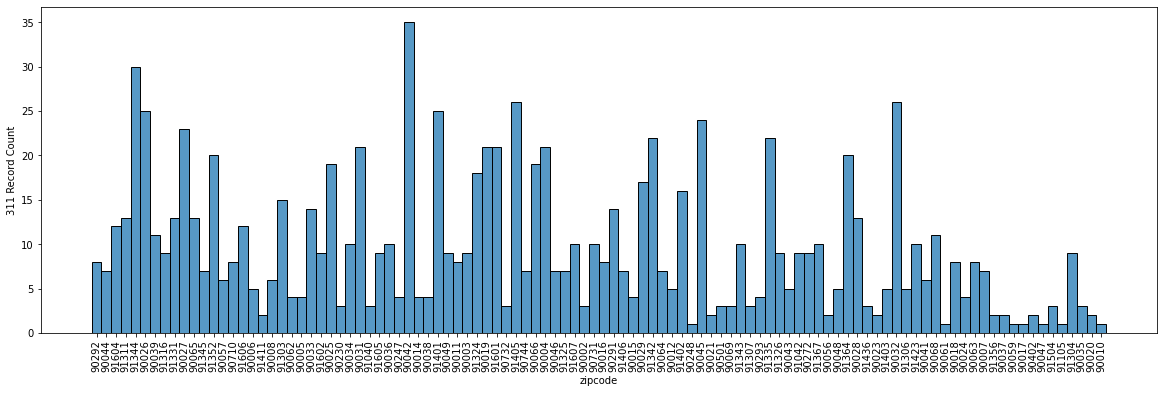

In [8]:
plt.figure(figsize = (20,6))
sns.histplot(df_311["zipcode"])
plt.xlabel("zipcode")
plt.ylabel('311 Record Count')
plt.xticks(rotation=90);

<Figure size 1152x576 with 0 Axes>

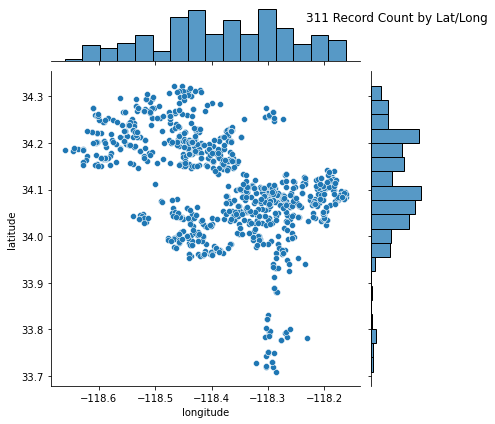

In [9]:
plt.figure(figsize = (16, 8))
sns.jointplot(x = df_311['longitude'], y = df_311['latitude'], kind='scatter')
plt.title('311 Record Count by Lat/Long', pad = 50)
plt.show();

In [10]:
df_311['requesttype'].value_counts()

Bulky Items                   588
Graffiti Removal              133
Illegal Dumping Pickup         60
Metal/Household Appliances     57
Homeless Encampment            41
Dead Animal Removal            38
Electronic Waste               29
Other                          28
Report Water Waste              9
Single Streetlight Issue        7
Multiple Streetlight Issue      7
Feedback                        3
Name: requesttype, dtype: int64

In [11]:
df_311['requesttype'].isnull().sum()

0

In [12]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html

codes, uniques = pd.factorize(df_311['requesttype'])

In [13]:
df_311['rt_codes'] = codes

In [14]:
df_311[['requesttype', 'rt_codes']].head()

,requesttype,rt_codes
0,Bulky Items,0
1,Dead Animal Removal,1
2,Bulky Items,0
3,Metal/Household Appliances,2
4,Other,3


<Figure size 1152x576 with 0 Axes>

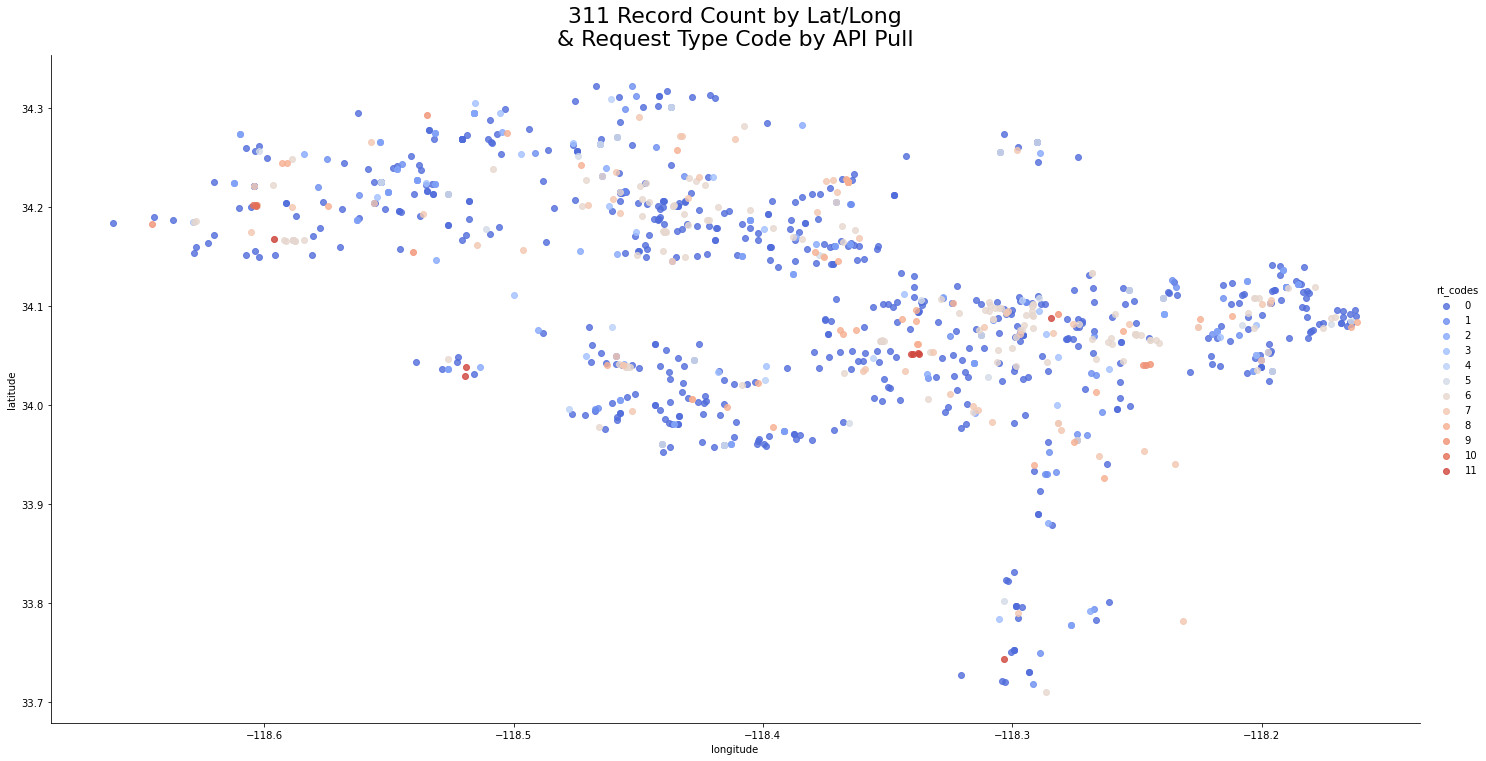

In [15]:
plt.figure(figsize = (16, 8))
sns.lmplot( x="longitude", y="latitude", data=df_311, fit_reg=False, 
           hue='rt_codes', 
           palette = 'coolwarm', 
           height = 10, aspect = 2, legend = True)

plt.title('311 Record Count by Lat/Long\n& Request Type Code by API Pull', pad = 10, fontsize = 22)

plt.show();

In [61]:
zip_box_catplot = pd.DataFrame(df_311.groupby('zipcode')['rt_codes'].value_counts().sort_values(ascending = False)).rename(columns={'rt_codes' : 'counts'}).reset_index()
zip_box_catplot.head()

,zipcode,rt_codes,counts
0,90042,0,24
1,91344,0,22
2,90045,0,19
3,90032,0,19
4,91405,0,17


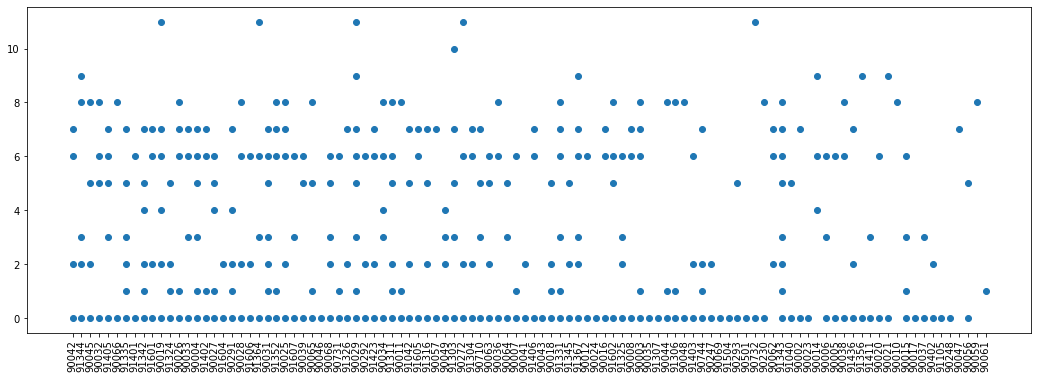

In [64]:
plt.figure(figsize = (18,6))
plt.scatter(zip_box_catplot['zipcode'], zip_box_catplot['rt_codes'])
plt.xticks(rotation=90)
plt.plot();